<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install autorch >log.txt

In [21]:
import pandas as pd
import joblib
import autorch
from torch import nn#
from torch.optim import Adam
max_epochs = 15

# c620 模擬數據

  0%|          | 0/15 [00:00<?, ?it/s]

dict_keys(['x41', 'case', 'yRefluxRate', 'yControl', 'yHeatDuty', 'vent_gas_x', 'distillate_x', 'sidedraw_x', 'bottoms_x', 'vent_gas_sf', 'distillate_sf', 'sidedraw_sf', 'bottoms_sf', 'density'])


  7%|▋         | 1/15 [00:00<00:03,  4.27it/s]

epoch:0 train_loss:2.5399 valid_loss:2.1981


100%|██████████| 15/15 [00:03<00:00,  4.61it/s]


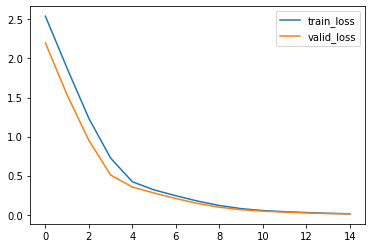

In [22]:
# load data
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0)
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')
print(c.keys())
# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c620_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c620_model = autorch.utils.PartBulider(c620_df,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs)
c620_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c620_model.optimizer = Adam(c620_model.net.parameters(),lr=0.01)
c620_model.train()

In [23]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,1.05274e-08,0.00623173
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0.678064,6.40646e-06,0.199857
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0.971213,1.41714e-05,0.322896
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0.970645,0.000105253,0.796648
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0.937038,0.00101905,3.12743
...,...,...,...
Density_Bottoms Production Rate and Composition,0.998573,2.38654e-11,0.000520252
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.970216,4.05834,0.887385
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,8.48525,0.509459
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,10.1484,0.513016


# c620遷移學習

In [24]:
# use pretrain net continue training
from copy import deepcopy
pretrain_net = deepcopy(c620_model.net.train())
print(pretrain_net)

Linear(in_features=44, out_features=172, bias=True)


In [25]:
c620_model = autorch.utils.PartBulider(c620_df_real,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c620_model.net = pretrain_net # use pretrain net
c620_model.optimizer = Adam(c620_model.net.parameters())

100%|██████████| 15/15 [00:00<00:00, 266.10it/s]

epoch:0 train_loss:0.3087 valid_loss:0.1949


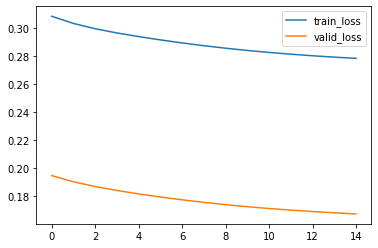

In [26]:
c620_model.train()

In [27]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,0.00558406,6.8511
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0,0.0353101,18.3676
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0,0.155684,39.3736
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0,0.161306,40.0652
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0,0.181293,42.5135
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.00481871,6.63345
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0,171.256,9.62612
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0,291.811,8.01039
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0,414.706,7.8531


In [28]:
# save
joblib.dump(c620_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data_linear.pkl']

# c660 模擬數據

  7%|▋         | 1/15 [00:00<00:02,  4.74it/s]

epoch:0 train_loss:1.8255 valid_loss:1.7817


100%|██████████| 15/15 [00:03<00:00,  4.64it/s]


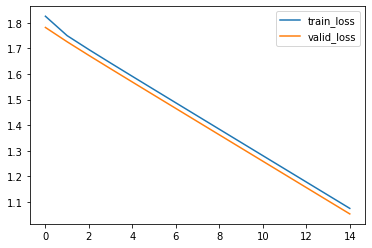

In [29]:
# load data
c660_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c660_train.csv',index_col=0)
c660_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c660_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c660_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c660_model = autorch.utils.PartBulider(c660_df,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs)
c660_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c660_model.optimizer = Adam(c660_model.net.parameters())
c660_model.train()

In [30]:
c660_model.test(e=0.02)

,R2,MSE,MAPE
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Hydrogen_Fraction,0,7.3759e-06,0.148477
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Methane_Fraction,0.679005,0.00707877,8.72659
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Ethane_Fraction,0.891109,0.00789713,21.0941
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Propane_Fraction,0.937807,0.00590498,29.551
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Butane_Fraction,0.914676,0.00600165,39.7357
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.000935994,2.8202
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0,9951.42,67.3841
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0,2030.05,49.4806
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0,2329.08,51.3209


# c660遷移學習

In [31]:
pretrain_net = deepcopy(c660_model.net.train())
print(pretrain_net)

Linear(in_features=43, out_features=172, bias=True)


In [32]:
c660_model = autorch.utils.PartBulider(c660_df_real,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c660_model.net = pretrain_net # use pretrain net
c660_model.optimizer = Adam(c660_model.net.parameters())

100%|██████████| 15/15 [00:00<00:00, 276.95it/s]

epoch:0 train_loss:1.0981 valid_loss:1.0814


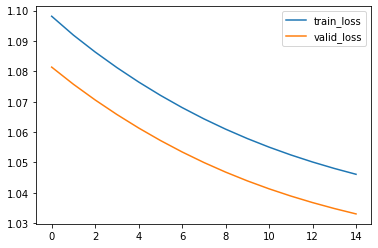

In [33]:
c660_model.train()

In [34]:
c660_model.test()

,R2,MSE,MAPE
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Hydrogen_Fraction,0,0.000429631,1.91071
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Methane_Fraction,0,0.0250835,NaN
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Ethane_Fraction,0,0.0014137,NaN
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Propane_Fraction,0,0.000187694,NaN
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Butane_Fraction,0,5.74426e-05,NaN
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.00427773,5.73296
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0,8259.95,68.0421
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0,2078.52,52.0365
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0,2480.76,54.324


In [35]:
# save
joblib.dump(c660_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data_linear.pkl']

# c670 模擬數據

In [36]:
# load data
import numpy as np
c670_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c670_train.csv',index_col=0)
c670_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c670_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c670_col_names.pkl')

In [37]:
# 根據條件修改值
def change_value(df):
  a = df[c['upper_bf']]
  紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
  紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
  紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
  紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
  df.loc[:,紫色零點零欄位] = 0.0001 
  df.loc[:,紫色零點一欄位] = 0.0001 
  df.loc[:,紫色零點九欄位] = 0.9999
  df.loc[:,紫色一點零欄位] = 0.9999
  return df

In [38]:
c670_df = change_value(c670_df)

In [39]:
c670_df_real = change_value(c670_df_real)

In [40]:
x_col = c['combined'] + c['upper_bf']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c670_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['distillate_sf']+c['bottoms_sf']
n_idx = [[i,i+41] for i in range(41)]

  7%|▋         | 1/15 [00:00<00:02,  4.70it/s]

epoch:0 train_loss:7.6240 valid_loss:7.5041


100%|██████████| 15/15 [00:03<00:00,  4.38it/s]


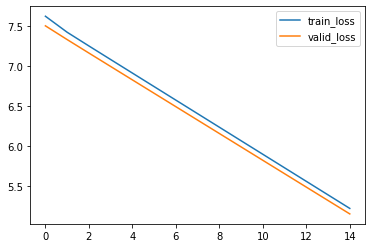

In [41]:
c670_model = autorch.utils.PartBulider(c670_df,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs)
c670_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c670_model.optimizer = Adam(c670_model.net.parameters())
c670_model.train()

In [42]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,1.12836e-06,0.0484656
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,0,3.05049e-06,0.111034
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,1.5726e-06,0.0514323
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,1.43181e-06,0.0694752
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,9.22721e-06,0.166325
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.000138996,1.07297
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,35364.9,71.3408
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,11986.9,59.5251
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,23905.1,67.7007


# c670 遷移學習

In [43]:
pretrain_net = deepcopy(c670_model.net.train())
print(pretrain_net)

Linear(in_features=82, out_features=87, bias=True)


In [44]:
c670_model = autorch.utils.PartBulider(c670_df_real,x_col,sp_col+op_col,limit_y_range=False,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c670_model.net = pretrain_net # use pretrain net
c670_model.optimizer = Adam(c670_model.net.parameters())

100%|██████████| 15/15 [00:00<00:00, 233.45it/s]

epoch:0 train_loss:5.7917 valid_loss:5.7756


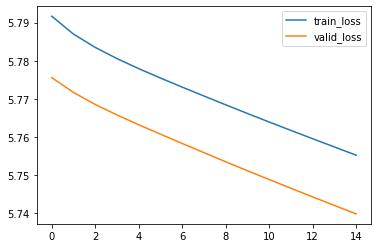

In [45]:
c670_model.train()

In [46]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,0.000254071,1.1989
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,0,0.000478077,1.02771
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,0.000255172,0.900185
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,5.17159e-05,0.295613
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,0.000672333,1.73464
...,...,...,...
Density_Bottoms Production Rate and Composition,0,0.00432302,5.03653
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,39998.2,76.5472
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,14937.1,66.7988
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0,27811.9,73.3676


In [47]:
joblib.dump(c670_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data_linear.pkl']